# Q4
The screw is a double-start ACME thread of M12x 1.5. The clamping force exerted at G is FG=900 N. The mean diameter of the collar is dc = 22 mm. Coefficients of friction for screw and collar are estimated as f = 0.3 and fc = 0.15 respectively. The screw will travel axially at 95 mm/s. Find,

i) The screw lead, mean diameter, and helix angle

ii) The force and axial stress acting on the screw

iii) The torque for lifting and for lowering the load

iv) The force needed to apply perpendicular at E to produce the clamping force

v) The angular rotation of the screw in rps

vi) The power produced by the power screw

vii) The efficiency of the jack when lifting the load

viii) Whether the screw is overhauling

**Well-defined problem**

1. Determine the maximum compressive force, if the new allowable normal stress at the screw is 30 MPa.

2. Recommend the suitable length of the handle if the compression force is increased to 1.5 kN, thus the user needs to apply force of 100 N on the handle.

3. Determine the new efficiency on the screw if a SQUARE thread is used. Compare the efficiency.


In [1]:
# Required
from math import sin, cos, tan, pi, atan, asin, degrees, radians
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Dimensions in m
print('Power Screw Type: Acme thread')
screw_type = 2 # double-start
alpha = 14.5
d_outer = 0.012
pitch = 0.0015
d_collar = 0.022
f_screw = 0.3
f_collar = 0.15
v_linear = 95e-3
F_c = 900

Power Screw Type: Acme thread


i) The screw lead, mean diameter, and helix angle

$$Lead, L=np$$

$L=(2)(1.5)$

In [3]:
Lead = screw_type*pitch
print(f'Lead={Lead*1000} mm')

Lead=3.0 mm


Find mean diameter, $d_m = \frac {D+(D-p)}{2}$

$d_m = \frac {12+(12-3)}{2}$

In [4]:
d_inner = d_outer-pitch
d_mean = (d_outer+d_inner)/2

print(f'Mean diameter={d_mean*1000}mm')

Mean diameter=11.25mm


Find helix angle, 
$$ \tan\lambda = \frac{L}{\pi d_m} $$


$$ \tan\lambda = \frac{3mm}{\pi (11.25mm)} $$

In [5]:
tan_lambda = Lead/(pi*d_mean)
print(f'tan(lambda)={tan_lambda}')
lambda_helix = round(degrees(atan(tan_lambda)),2)
print(f'Lambda = {lambda_helix}')

tan(lambda)=0.08488263631567751
Lambda = 4.85


ii) The force and axial stress acting on the screw

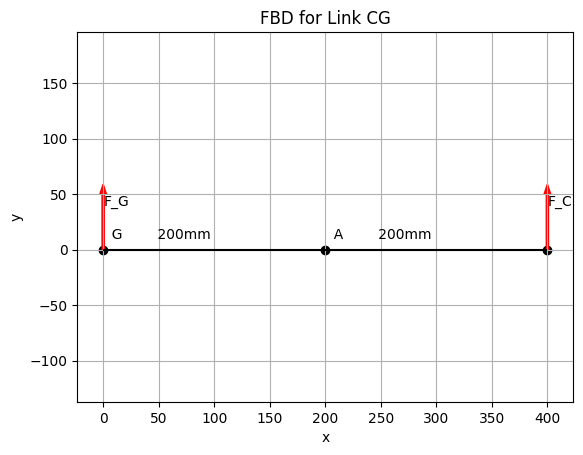

In [33]:
# FBD for Link AB

coorA = [0,0]
coorB = [200,0]
coorC = [400,00]

data = np.array([coorA,coorB,coorC])
x, y = data.T
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(coorA[0],coorA[1], 0,50,width=2,color='r')
ax.arrow(coorC[0],coorC[1], 0,50,width=2,color='r')
ax.hlines(0,0,400, color='k')

ax.set(xlabel='x', ylabel='y',
       title='FBD for Link CG')

ax.text(coorA[0],coorA[1]+40,f'F_G')
ax.text(coorC[0],coorC[1]+40,f'F_C')
ax.text(coorA[0],coorA[1]+10,f'  G        200mm')
ax.text(coorB[0],coorB[1]+10,f'  A        200mm')

plt.axis('equal')
plt.show()



Free body diagram

$$+\circlearrowleft \sum M_A=0$$
$$-900(0.2)+F_{screw}(0.2)=0$$
$$F_{screw}=-900N$$

Use 900N in calculation. Negative just to show compression.

Axial stress

$$\sigma = \frac{F_{screw}}{\frac {\pi d^2_{r}}{4}}$$

Use inner diameter to find axial stress

$$d_r=D-p$$
$$d_r=12-1.5$$

In [7]:
print(f'Inner diameter={d_inner*1000}mm')

Inner diameter=10.5mm


In [8]:
stress = F_c/(pi*pow(d_inner,2)/4)
print(f'Axial stress = {stress:.3e}Pa')
print(f'Axial stress = {stress/1e6:.3f}MPa')

Axial stress = 1.039e+07Pa
Axial stress = 10.394MPa


iii) The torque for lifting and for lowering the load

Torque to lift the load equation
$$T_u = \frac{Wd_m}{2} \frac{f+\cos\alpha_n \tan\lambda}{\cos\alpha_n - f\tan\lambda} + \frac{Wf_c d_c}{2}$$

$\alpha_n$ is unknown. Find using

$$\tan\alpha_n=\cos\lambda \tan \alpha$$

In [9]:
alpha_n = round(degrees(atan(cos(radians(lambda_helix))*tan(radians(alpha)))),2)
print(f'alpha_n = {alpha_n}')

alpha_n = 14.45


In [10]:
T_u =(F_c*d_mean/2)*((f_screw+(cos(radians(alpha_n))*tan(radians(lambda_helix))))/(cos(radians(alpha_n))-(f_screw*tan(radians(lambda_helix)))))+(F_c*f_collar*d_collar/2)
print(f'T_u={T_u:.2f}Nm')

T_u=3.54Nm


Torque to lower the load

$$T_d = \frac{Wd_m}{2} \frac{f-\cos\alpha_n \tan\lambda}{\cos\alpha_n + f\tan\lambda} + \frac{Wf_c d_c}{2}$$

In [11]:
T_d =(F_c*d_mean/2)*((f_screw-(cos(radians(alpha_n))*tan(radians(lambda_helix))))/(cos(radians(alpha_n))+(f_screw*tan(radians(lambda_helix)))))+(F_c*f_collar*d_collar/2)
print(f'T_d={T_d:.2e}Nm')

T_d=2.59e+00Nm


iv) The force needed to apply perpendicular at E to produce the clamping force

$$T_u=F \times d$$

where, d is perpendicular distance to generate the torque.

$$3.53=F \times 125\times 10^{-3}$$

In [12]:
F_E = T_u/(125e-3)  # 1.25 mm is the perpendicular distance to generate the torque
print(f'Force at E = {F_E:.2f}N')

Force at E = 28.29N


v) The angular rotation of the screw in rps (revolution per second)

If rpm is used
$$V_{linear}=Lead \times n_{rpm} \times \frac {1 min}{60 s}$$

Change rpm to rps

$$V_{linear}=Lead \times n_{s}$$

We know, lead is mm/rev OR mm/turn

Therefore,

$$\frac{95mm}{s}=\frac{3mm}{1rev} \times n_{s}$$
$$n_s= \frac{95mm/s}{3mm/rev}$$

In [13]:
n_sec = v_linear/Lead
print(f'Screw rotational speed = {n_sec:.2f}rev/s')

Screw rotational speed = 31.67rev/s


vi) The power produced by the power screw

Convert rps to rpm

$$\frac {31.67 rev}{s} \times \frac {60s}{1m}=1900rpm$$

Then substitute into power equation

$$P=\frac{2\pi n}{60} T_u$$

In [14]:
n_rpm = n_sec*60
print(f'n_rpm = {n_rpm}rpm')
Power = round((2*pi*n_rpm/60)*T_u,2)
print(f'Power = {Power} W')

n_rpm = 1900.0rpm
Power = 703.72 W


vii) The efficiency of the jack when lifting the load

Efficiency equation
$$e=\frac{d_m \tan \lambda}{d_m \frac{f+\cos\alpha_n \tan\lambda}{\cos\alpha_n - f\tan\lambda}+d_c f_c}$$

In [15]:
efficiency=(d_mean*tan_lambda)/(d_mean*((f_screw+(cos(radians(alpha_n))*tan_lambda))/(cos(radians(alpha_n))-(f_screw*tan_lambda)))+(d_collar*f_collar))
print(f'Efficiency={efficiency}')

Efficiency=0.12149080284030114


viii) Whether the screw is overhauling

Overhaul when $f<\cos \alpha_n \tan \lambda$

In [16]:
checkOverhaul = atan(cos(radians(alpha_n))*tan(radians(lambda_helix)))
print(f'cos alpha_n tan lambda={checkOverhaul}')
print(f'f_screw,{f_screw} larger than cos alpha_n tan lambda,{checkOverhaul}')

cos alpha_n tan lambda=0.08198285632251331
f_screw,0.3 larger than cos alpha_n tan lambda,0.08198285632251331


f_screw larger than $\cos \alpha_n \tan \lambda$. So the screw will not overhaul.

**Well-define problem**

1. Determine the maximum compressive force, if the new allowable normal stress at the screw is 30 MPa.

In [17]:
print(f'From allowable stress {stress/1E+6:.2f}MPa to 30 MPa')
stress_new = 30E+6

From allowable stress 10.39MPa to 30 MPa


Axial stress

$$\sigma = \frac{F_{screw}}{\frac {\pi d^2_{r}}{4}}$$

New force at screw, $F'_{screw}$
$$30Mpa = \frac{F'_{screw}}{\frac {\pi (0.0105)}{4}}$$

In [18]:
f_screw_new = round(stress_new*(pi*pow(d_inner,2)/4),2)
print(f'f_screw_new={f_screw_new} N')

f_screw_new=2597.7 N


$$+\circlearrowleft \sum M_A=0$$
$$F'_c(0.2)+F'_{screw}(0.2)=0$$
$$F'_c(0.2)+2597.7(0.2)=0$$
$$F_{screw}=-2597.7N$$

In [19]:
F_c_new = f_screw_new
print(f'F_c_new={F_c_new} N')

F_c_new=2597.7 N


2. Recommend the suitable length of the handle if the compression force is increased to1.5 kN, thus the user needs to apply force of 100 N on the handle.

In [20]:
F_c_2 = 1500
F_E_2 = 100
f_screw_2 = F_c_2*0.2/0.2
print(f'f_screw_2={f_screw_2} N')

f_screw_2=1500.0 N


$$+\circlearrowleft \sum M_A=0$$
$$F'_{c2}(0.2)+F'_{screw2}(0.2)=0$$
$$(1500)(0.2)+F'_{screw2}(0.2)=0$$
$$F'_{screw2}=-1500N$$

Find new T_u

$$T_{u2}= \frac{Wd_m}{2} \frac{f+\cos\alpha_n \tan\lambda}{\cos\alpha_n - f\tan\lambda} + \frac{Wf_c d_c}{2}$$

In [21]:
T_u_2 =(F_c_2*d_mean/2)*((f_screw+(cos(radians(alpha_n))*tan(radians(lambda_helix))))/(cos(radians(alpha_n))-(f_screw*tan(radians(lambda_helix)))))+(F_c_2*f_collar*d_collar/2)
print(f'T_u_2={T_u_2:.2f}Nm')

T_u_2=5.89Nm


$$T_{u2}=F_{E2} \times d_{new}$$

where, d is perpendicular distance to generate the torque.

$$5.89=100 \times d_{new}$$

In [22]:
d_new = T_u_2/F_E_2
print(f'd_new={d_new:.3f} m')
print(f'd_new={d_new*1000:.2f} mm')


d_new=0.059 m
d_new=58.95 mm


3. Determine the new efficiency on the screw if a square thread is used. Compare the efficiency.

Efficiency equation
$$e=\frac{d_m \tan \lambda}{d_m \frac{f+\cos\alpha_n \tan\lambda}{\cos\alpha_n - f\tan\lambda}+d_c f_c}$$

Use $\alpha=0$

In [23]:
alpha_n=0
efficiency_new=(d_mean*tan_lambda)/(d_mean*((f_screw+(cos(radians(alpha_n))*tan_lambda))/(cos(radians(alpha_n))-(f_screw*tan_lambda)))+(d_collar*f_collar))
print(f'New Efficiency={efficiency_new}')
print(f'Previous Efficiency={efficiency}')

New Efficiency=0.12332698372056254
Previous Efficiency=0.12149080284030114


Square thread is more efficient than Acme thread.